In [ ]:
#FROM THE GIVEN 'IRIS' DATASET,PREDICT THE OPTIMUM NUMBER OF CLUSTERS AND REPRESENT IT VISUALLY.

In [ ]:
#LOADING THE NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries Imported Successfully")

Libraries Imported Successfully


In [ ]:
from sklearn import datasets

In [ ]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#DATASET SIZE
df.shape

(150, 4)

In [ ]:
#DATASET INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


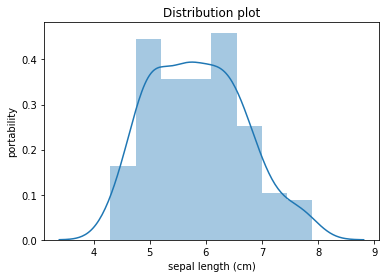

In [ ]:
#UNIVARIATE ANALYSIS
sns.distplot(df['sepal length (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('portability')
plt.title('Distribution plot')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


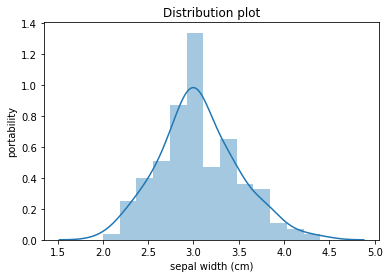

In [ ]:
sns.distplot(df['sepal width (cm)'])
plt.xlabel('sepal width (cm)')
plt.ylabel('portability')
plt.title('Distribution plot')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


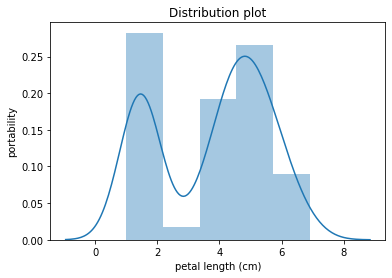

In [ ]:
sns.distplot(df['petal length (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('portability')
plt.title('Distribution plot')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


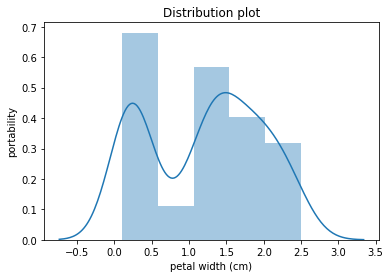

In [ ]:
sns.distplot(df['petal width (cm)'])
plt.xlabel('petal width (cm)')
plt.ylabel('portability')
plt.title('Distribution plot')
plt.show()

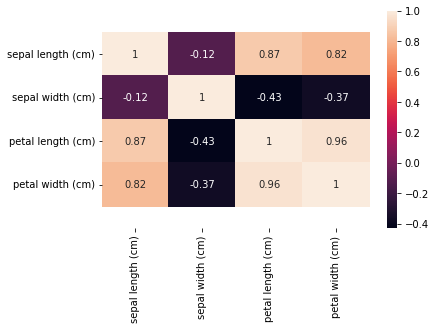

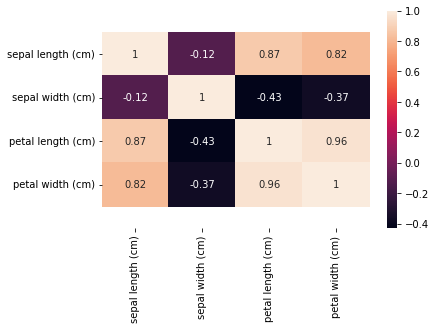

In [ ]:
ax=sns.heatmap(df.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

<function matplotlib.pyplot.show>

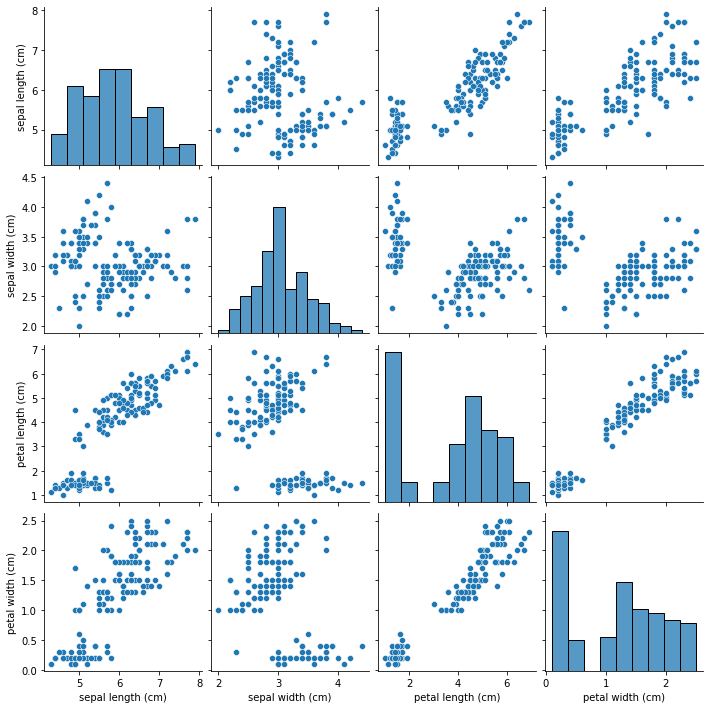

In [ ]:
#a.There is high positive correlation between:
#1.sepal length and petal width
#2.petal length and petal width
#3.sepal length and petal length
#b.There is a negative correlation between:
#1.sepal width and petal width
#2.sepal width and petal length
#3.sepal length and sepal width
sns.pairplot(df)
plt.show

In [ ]:
#checking for the multicollinearity
import statsmodels.api as sm
Xc=sm.add_constant(df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame({'VIF':vif[1:]},index=df.columns)

,VIF
sepal length (cm),7.072722
sepal width (cm),2.100872
petal length (cm),31.261498
petal width (cm),16.090175


In [ ]:
#DATA PREPERATION
#1.STANDARD SCALING
#2.PCA APPLICATION
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
dfs=ss.fit_transform(df)
dfs=pd.DataFrame(dfs)
dfs.columns=df.columns
dfs.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
from sklearn.decomposition import PCA
pca=PCA()

In [ ]:
pca.fit(dfs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pd.DataFrame({'Eigen_values':pca.explained_variance_,'proportion explained':pca.explained_variance_ratio_,'cumlative proprtion explained':np.cumsum(pca.explained_variance_ratio_)})

,Eigen_values,proportion explained,cumlative proprtion explained
0,2.938085,0.729624,0.729624
1,0.920165,0.228508,0.958132
2,0.147742,0.036689,0.994821
3,0.020854,0.005179,1.000000


In [ ]:
#The first 2PCs explain 95% of variation.Thus, considering only PC1 AND PC2
pca=PCA(0.95)

In [ ]:
df_pca=pca.fit_transform(dfs)

In [ ]:
cols=list(df.columns)

In [ ]:
PCA_df=pd.DataFrame(pca.components_.T,index=cols,columns=['PC1','PC2']).reset_index().rename(columns={'index':'features'})
PCA_df

,features,PC1,PC2
0,sepal length (cm),0.521066,0.377418
1,sepal width (cm),-0.269347,0.923296
2,petal length (cm),0.580413,0.024492
3,petal width (cm),0.564857,0.066942


In [ ]:
#kmeans clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
kmeans=KMeans(random_state=0)

In [ ]:
wcss=[]
sil_score=[]
for k in range(2,15):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(df_pca)
  wcss.append(kmeans.inertia_)
  sil_score.append(silhouette_score(df_pca,kmeans.labels_))
print(wcss,'\n',sil_score)

[197.40381604541298, 115.18647050742706, 89.54315434788859, 66.18758354093679, 57.087384775988895, 47.71734996142807, 40.02962266891693, 32.12667995141308, 28.528092688375235, 24.96778415979056, 22.27744084984426, 19.68212985515474, 18.08179926582752] 
 [0.6145202036222636, 0.5113245176427448, 0.44179937597864105, 0.41433775626029606, 0.42330348057613226, 0.43358807798305815, 0.4151418158632326, 0.4384358976192074, 0.44366880096406464, 0.4341864959015457, 0.43589743394366226, 0.4368487600132816, 0.43051005126874275]


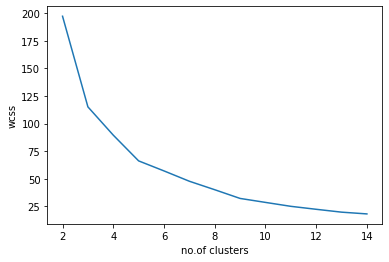

In [ ]:
#Elbow plot
plt.plot(range(2,15),wcss)
plt.xlabel('no.of clusters')
plt.ylabel('wcss')
plt.show()

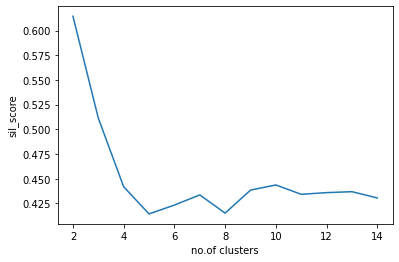

In [ ]:
#sithoute score
plt.plot(range(2,15),sil_score)
plt.xlabel('no.of clusters')
plt.ylabel('sil_score')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,n_init=15,random_state=0)

In [ ]:
kmeans.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
pd.Series(kmeans.labels_).value_counts()

2    53
1    50
0    47
dtype: int64

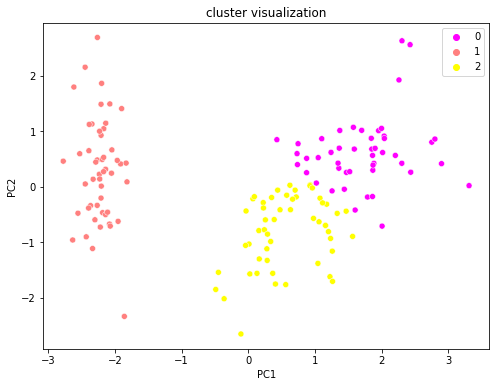

In [ ]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=df_pca[:,0],y=df_pca[:,1],hue=kmeans.labels_,palette='spring')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('cluster visualization')
plt.show()

In [ ]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1
0,1.721037,0.602887
1,-2.224753,0.288927
2,0.572621,-0.807209


In [ ]:
df['labels']=kmeans.labels_

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
df.groupby('labels').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
labels,,,,
0,6.780851,3.095745,5.510638,1.972340
1,5.006000,3.428000,1.462000,0.246000
2,5.801887,2.673585,4.369811,1.413208


In [ ]:
#with regars to 3 clusters,below are some observation
#1.The sepal length of flower in cluster 0 is largest
#2.The sepal width of flower cluster 2 is smallest
#3.The petal length of flower in cluster 0 is largest.This was to happen as sepal length and petal length are highly correlated.
#4.The petal width of flower in cluster 1 is the least